<a href="https://colab.research.google.com/github/Olmaro/Olmaro/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Olivia Roberts**
food_sales_predictions

In [22]:
from google.colab import drive

In [23]:
import pandas as pd
filename = '/content/drive/MyDrive/Coding Dojo/Portfolio/sales_predictions.csv'

In [24]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###**Data Dictionary**
  **Variable Name:	Description**
   - **Item_Identifier:**	Unique product ID
   - **Item_Weight	Weight:** of product
   - **Item_Fat_Content:**	Whether the product is low fat or regular
   - **Item_Visibility:**	The percentage of total display area of all products in are  located to the particular product
   - **Item_Type:**	The category to which the product belongs
   - **Item_MRP:**	Maximum Retail Price (list price) of the product
   - **Outlet_Identifier:**	Unique store ID
   - **Outlet_Establishment_Year:**	The year in which store was established
   - **Outlet_Size:**	The size of the store in terms of ground area covered
   - **Outlet_Location_Type:**	The type of area in which the store is located
   - **Outlet_Type:**	Whether the outlet is a grocery store or some sort of supermarket
   - **Item_Outlet_Sales:**	Sales of the product in the particular store. This is the  target variable to be predicted.


In [25]:
#Running shape attribute to see how many rows and columns we are working with.
# 8523 rows x 12 columns
df.shape

(8523, 12)

In [26]:
#running dtypes to locate all datatypes efficently
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [27]:
#running duplicated and sum to see there are no duplicates... I hope! ;)
df.duplicated().sum()

0

In [28]:
#Locating columns with missing data/"NaN" and "summing" to locate areas requiring attention
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
#I decided to remove the 'Item Weight' Column as it seemed unnecessary to predicting the sales and highly difficult to calculate the correct data for 1463 items.
df.drop(columns='Item_Weight', inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
# For the 'Outlet_Size', I do not know if this information is necesssary or not. The simplest solution appears to be to fill the missing instances wiht'Missing" so it does not cause furhter issue.
df['Outlet_Size'].fillna('Missing', inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [31]:
#Running df to confirm all of my changes have been made.
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [32]:
#After review, it appears that 'Item Fat Content' is the only column with incon. data.
#Inititally, I was going to try to individually correct eavh of these instances of incon. data.
df.loc[28, 'Item Fat Content'] = 'Low Fat'

In [33]:
#I then decided that was a waste of my *very precious* time, and "Googled around" until i found the solution of using a data dictionary.
#Below I ran the value counts to view each of the incon. values that would need to be added to the data dict.
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [34]:
#data dictionary being utilized to replace each of the incon. values.
#running the new df utilizing the  data dict.
dict = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}
df_consistent=df.replace({'Item_Fat_Content': dict})
df_consistent

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item Fat Content
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,NaN
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,NaN
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,NaN
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800,NaN
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,NaN
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850,NaN
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NaN
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,NaN


In [35]:
#confirming new df only containts 2 values in the 'Item Fat Content' column.
df_consistent['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [36]:
# Agregating the available statistics.
df_consistent.agg(
       {
        'Item_Visibility': ["min", "max", "mean", ],
        'Item_MRP': ["min", "max", "mean", ],
        'Outlet_Establishment_Year': ["min", "max", "mean", ],
        'Item_Outlet_Sales': ["min", "max", "mean", ],
    }
)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,0.000000,31.290000,1985.000000,33.290000
max,0.328391,266.888400,2009.000000,13086.964800
mean,0.066132,140.992782,1997.831867,2181.288914


#**Week 3**


###For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:



### - **Histogram** to view the distributions of various features in your dataset.

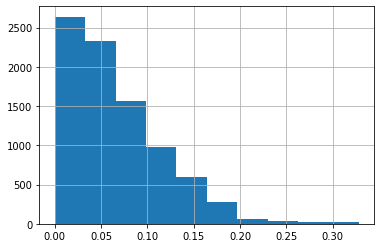

In [37]:
df['Item_Visibility'].hist()

### - **Boxplot** to view statistical summaries of various features in your dataset.


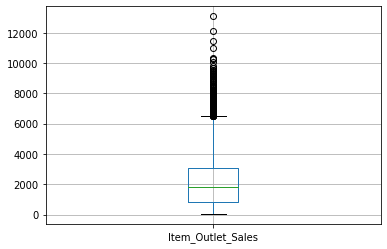

In [38]:
df.boxplot(column= 'Item_Outlet_Sales');

### - **Heatmap** of the correlation between features.

In [41]:
import seaborn as sns
#sns.heatmap(corr, cmap = 'Greens')

#**Week 4**

The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 4, your task is to build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

Build on your previous cleaning, exploration, and analysis.  
Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

corr of outlet sales and outlet type

In [ ]:
#sns.heatmap(corr, cmap = 'Greens')

#**Week 5**

### **The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.**

#### For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.  

#### You should reload the original data set here using pd.read_csv() to ensure there is no data leakage!


In [42]:
filename = '/content/drive/MyDrive/Coding Dojo/Portfolio/sales_predictions.csv'
ml_df = pd.read_csv(filename)
ml_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


 - Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
 

In [44]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [45]:
ml_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [46]:
ml_df.duplicated().sum()

0

In [47]:
ml_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [48]:
dict = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}
ml_df_consistent = ml_df.replace({'Item_Fat_Content': dict})
ml_df_consistent

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [49]:
ml_df_consistent['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### - Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  

In [50]:
y = ml_df_consistent['Item_Outlet_Sales']
X = ml_df_consistent.drop(columns = 'Item_Outlet_Sales')

### - Perform a train test split 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [55]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=42)

In [58]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

6392
2131
6392
2131


### - Create a preprocessing object to prepare the dataset for Machine Learning

In [59]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [61]:
ohe = OneHotEncoder (handle_unknown = 'ignore')
scaler = StandardScaler()

In [62]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [63]:
from sklearn.compose import make_column_transformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [64]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5c50ba9b90>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5c50b96350>)])

### - Make sure your imputation of missing values occurs  after the train test split using SimpleImputer. 

In [66]:
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

In [67]:
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

In [68]:
num_tuple = (median_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)

col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5c50ba9b90>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5c50b96350>)])

In [69]:
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5c50ba9b90>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5c50b96350>)])

In [70]:
X_train_imputed = col_transformer.transform(X_train)
X_test_imputed = col_transformer.transform(X_test)

In [71]:
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.isna().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
dtype: bool